Estimado candidato,

Estamos encantados de que estés considerando unirte a nuestro equipo de ciencia de datos. Como parte de nuestro proceso de evaluación, te pedimos que completes la siguiente prueba técnica.

**Descripción de la tarea:**

Se te proporciona un conjunto de datos anónimos que consta de varias columnas nombradas como 'col1', 'col2', 'col3', etc., hasta 'col20', y una columna 'target' que representa la variable objetivo. Tu tarea es realizar un análisis exploratorio de datos (EDA) y construir un modelo de aprendizaje automático para predecir la variable 'target'.

**Detalles de la tarea:**

1. **Análisis exploratorio de datos (EDA):** Realiza un análisis exploratorio detallado de los datos. Esto debe incluir, pero no está limitado a:
   - Estadísticas descriptivas de las variables (mínimo, máximo, media, mediana, desviación estándar, etc.).
   - Verificación de valores perdidos o anómalos.
   - Análisis de correlación entre las variables.
   - Visualizaciones para entender mejor las distribuciones y relaciones de los datos.

2. **Preprocesamiento de datos:** Prepárate para realizar cualquier limpieza o transformación necesaria de los datos basándote en tu EDA.

3. **Creación de un modelo de línea base (Baseline):** Entrena varios modelos de aprendizaje automático para predecir la variable 'target'. Comienza con modelos sencillos como la regresión logística y avanza hacia modelos más complejos como los árboles de decisión, random forest, SVM, XGBoost, etc.

4. **Evaluación del modelo:** Evalúa el rendimiento de cada modelo utilizando métricas apropiadas. Por ejemplo, si 'target' es una variable binaria, podrías considerar la precisión, la sensibilidad, la especificidad, el AUC-ROC, etc.

5. **Selección del modelo:** Selecciona el modelo que creas que funciona mejor. Justifica tu elección basándote en las métricas de evaluación y cualquier otra consideración pertinente.

6. **Predicción:** Usa tu modelo seleccionado para hacer predicciones en el conjunto de datos.

**Entregables:**

Por favor, proporciona el código que hayas utilizado para completar esta tarea, junto con un informe detallado que explique tu enfoque y los resultados. El informe debe estar bien estructurado y ser fácil de seguir, permitiendo a los evaluadores entender tu proceso de pensamiento y las decisiones que hayas tomado.

¡Buena suerte y esperamos ver tu solución!

## Carga de datos

In [137]:
import pandas as pd
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error # regresion
from sklearn.metrics import balanced_accuracy_score #Clasficación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score


#Clasificacion
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, \
accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [138]:
train = pd.read_csv("data/train.csv")

In [139]:
train

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


## Primer análisis

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   int64  
dtype

In [141]:
for i in train.columns:
    print(f"columna: {i} - {train[i].mean()}")

columna: ID - 3962.9099517598715
columna: col1 - 0.6747972127925674
columna: col2 - 14.438840450241202
columna: col3 - 0.16360282294086118
columna: col4 - 1.5797016258710024
columna: col5 - 0.042747364659639096
columna: col6 - 2.2130927282472754
columna: col7 - 0.25088976237269967
columna: col8 - 0.8076541004109346
columna: col9 - 0.7660568161515099
columna: col10 - 0.3243094514918706
columna: col11 - 0.32969287118098983
columna: col12 - 0.10005020546721458
columna: col13 - 9.81926746471324
columna: col14 - 1.3318795783455422
columna: col15 - 0.005194389851706271
columna: col16 - 16.621248883330356
columna: col17 - 2.9318956583884224
columna: col18 - 0.04960157227085939
columna: col19 - 0.14985527961407896
columna: col20 - 0.044999106664284444
columna: target - 0.11434697159192425


In [142]:
def cardinalidad(data):
    '''Funcion para saber la cardinalidad de las varibales que tenemos en el data frame'''
    df_cardin = pd.DataFrame([{
                'variable' : i,
                'tipo_dato' : data[i].dtypes,
                'cantidad_de_nulos' : data[i].isna().sum(),
                'valores_unicos' : data[i].unique(),
                'cardinalidad' : data[i].nunique(),
                'porcentaje_cardinalidad' : (data[i].nunique()/data.shape[0])*100
            } for i in data])
    return df_cardin

In [143]:
cardinalidad(train)

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,cardinalidad,porcentaje_cardinalidad
0,ID,int64,0,"[4995, 1709, 7825, 6918, 5, 1477, 5788, 5006, ...",5597,100.000000
1,col1,float64,0,"[0.02, 1.13, 0.07, 0.09, 0.94, 0.2, 0.05, 0.04...",479,8.558156
2,col2,float64,0,"[26.8, 3.95, 8.05, 26.4, 14.47, 1.28, 0.2, 19....",2320,41.450777
3,col3,float64,0,"[0.09, 0.32, 0.04, 0.03, 0.74, 0.01, 0.05, 0.0...",107,1.911738
4,col4,float64,0,"[1.35, 3.95, 0.14, 0.92, 2.88, 3.59, 0.08, 0.2...",470,8.397356
5,col5,float64,0,"[0.06, 0.03, 0.04, 0.09, 0.003, 0.0, 0.001, 0....",23,0.410934
6,col6,float64,0,"[0.09, 4.66, 0.06, 0.57, 0.8, 2.76, 0.02, 0.04...",784,14.007504
7,col7,float64,0,"[0.09, 0.56, 0.06, 0.0, 0.43, 0.39, 0.1, 0.02,...",91,1.625871
8,col8,float64,0,"[1.97, 1.89, 0.05, 0.36, 1.38, 1.26, 0.33, 1.8...",201,3.591210
9,col9,float64,0,"[1.48, 1.36, 0.0, 0.03, 0.11, 0.13, 0.74, 0.86...",151,2.697874


## Análisis gráfico de las variables

In [144]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    media_color = 'r'
    mediana_color = 'b'
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h', palette='husl')
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, palette='husl' , bins = 30)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe().round())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: ID



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


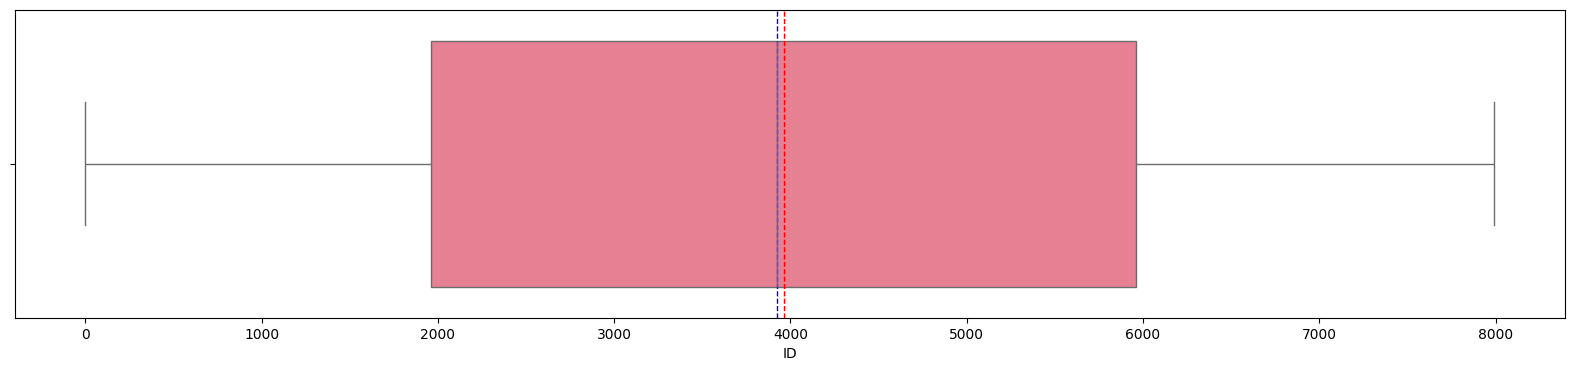

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


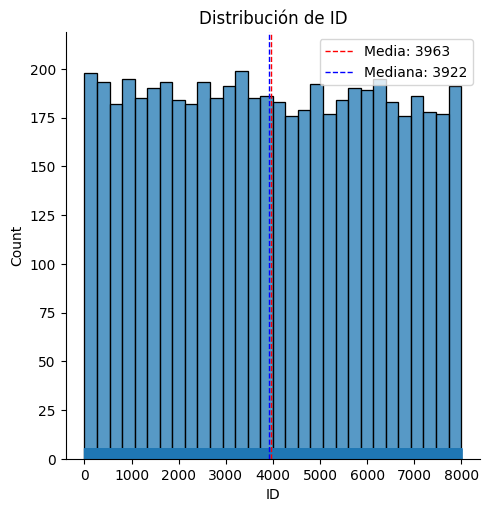

count    5597.0
mean     3963.0
std      2311.0
min         0.0
25%      1963.0
50%      3922.0
75%      5960.0
max      7993.0
Name: ID, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col1



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


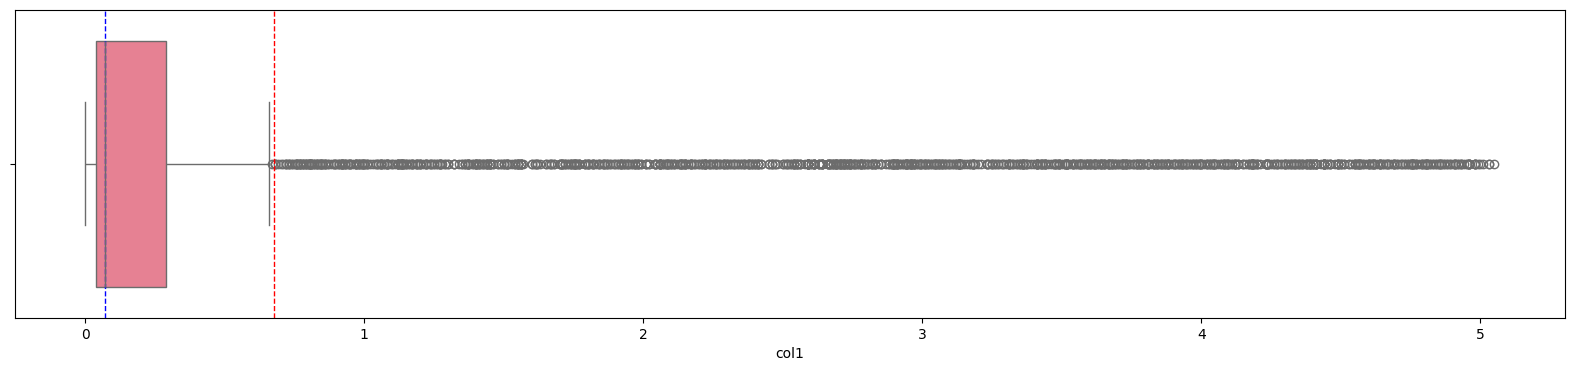

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


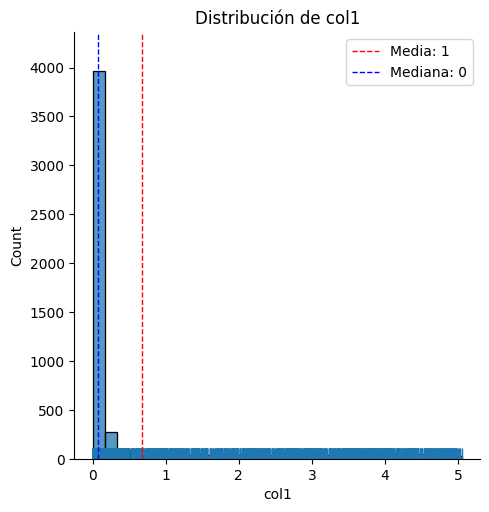

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         5.0
Name: col1, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col2



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


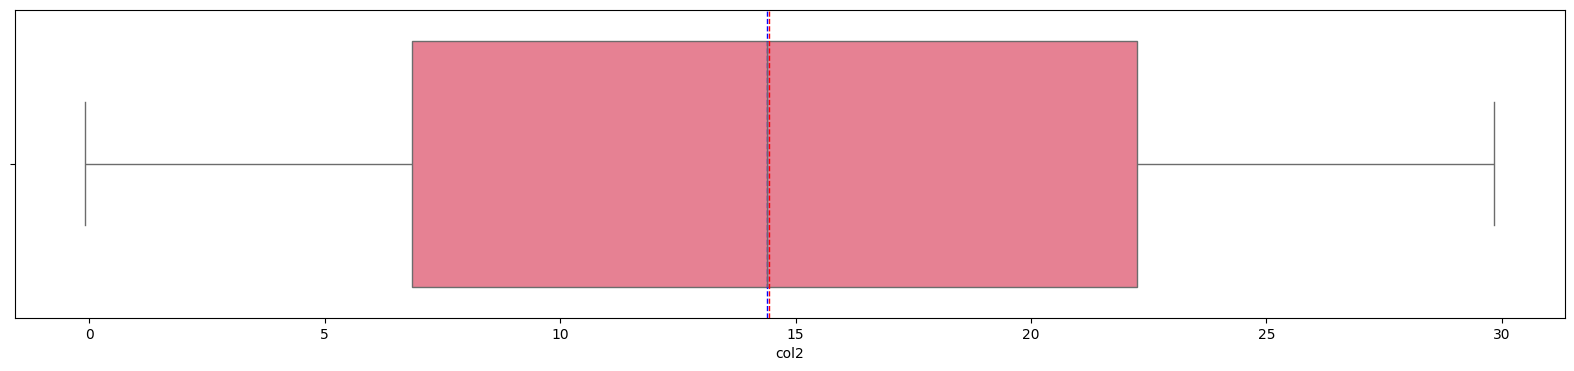

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


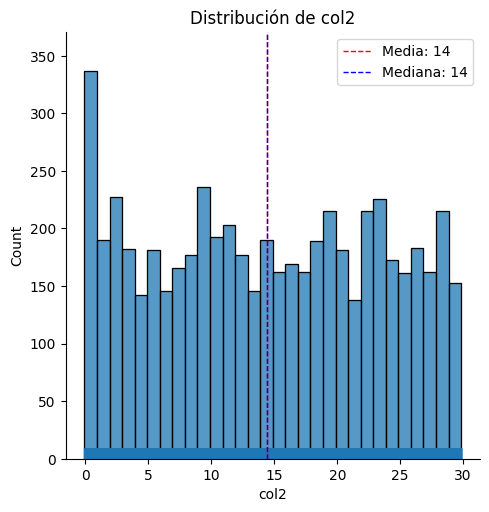

count    5597.0
mean       14.0
std         9.0
min        -0.0
25%         7.0
50%        14.0
75%        22.0
max        30.0
Name: col2, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col3



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


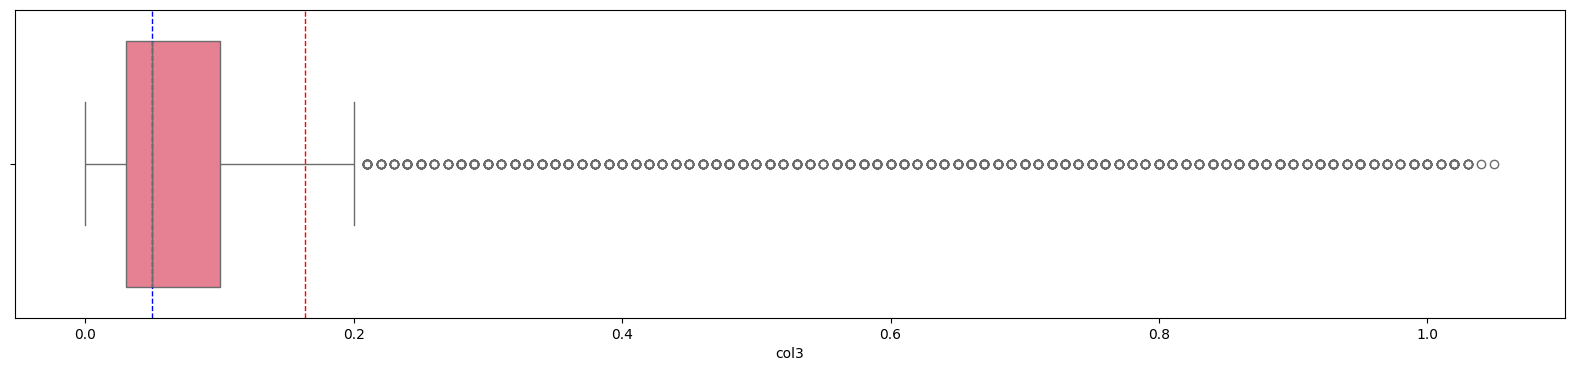

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


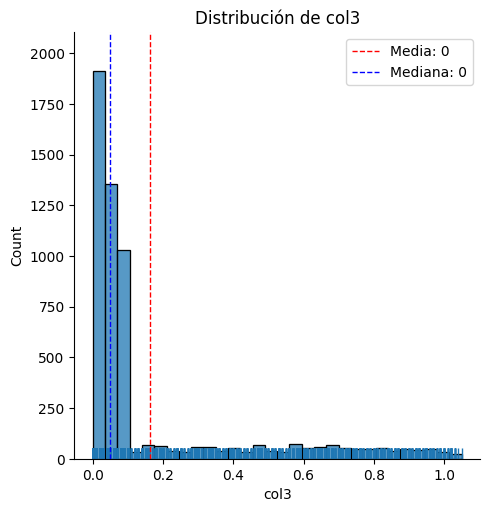

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: col3, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col4



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


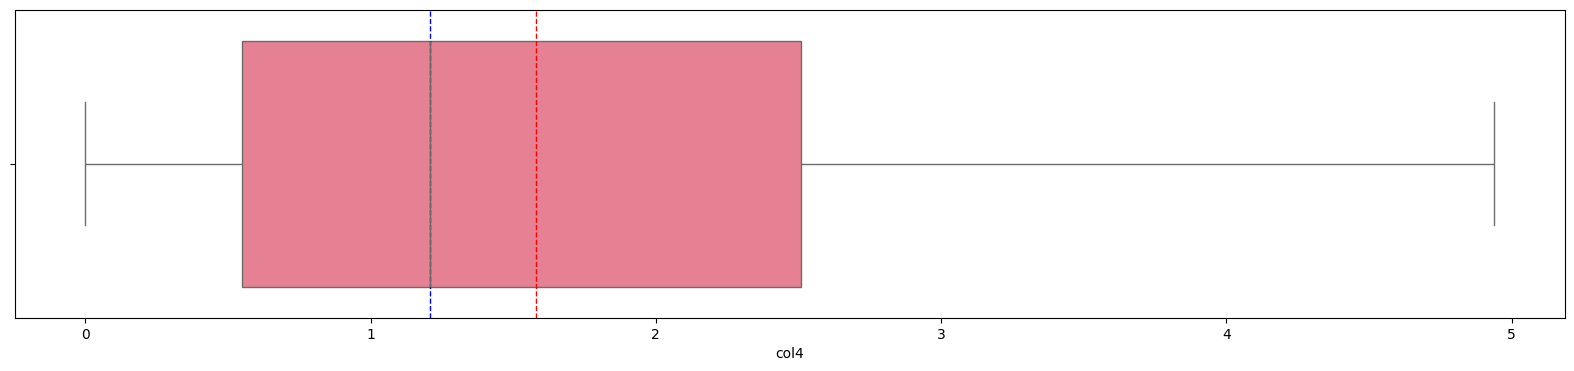

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


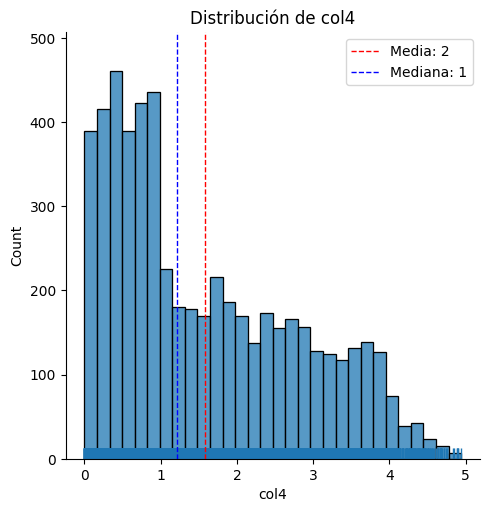

count    5597.0
mean        2.0
std         1.0
min         0.0
25%         1.0
50%         1.0
75%         3.0
max         5.0
Name: col4, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col5



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


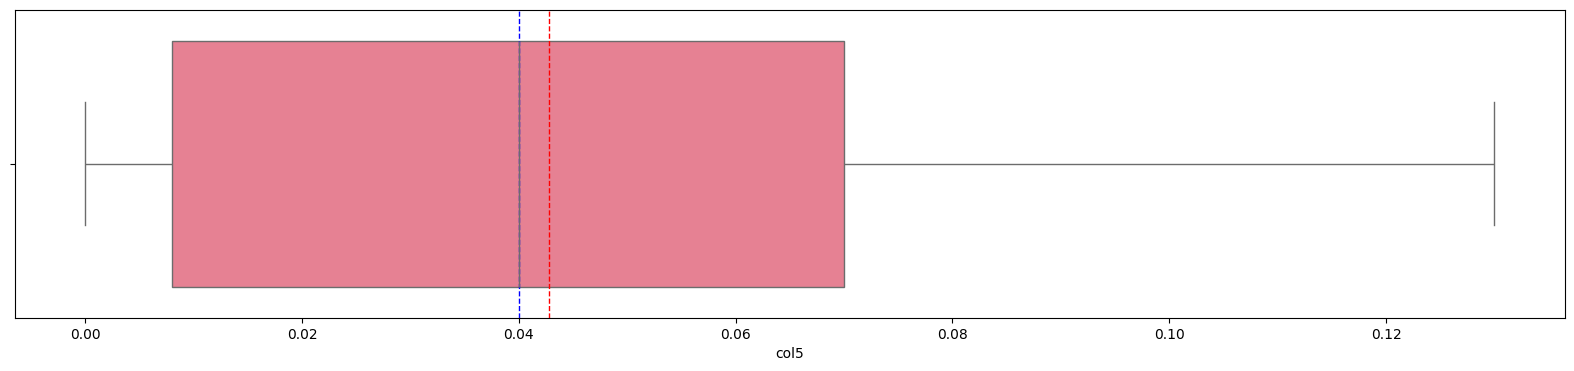

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


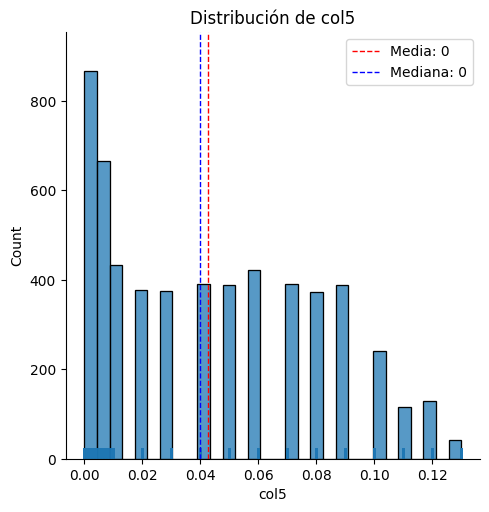

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col5, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col6



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


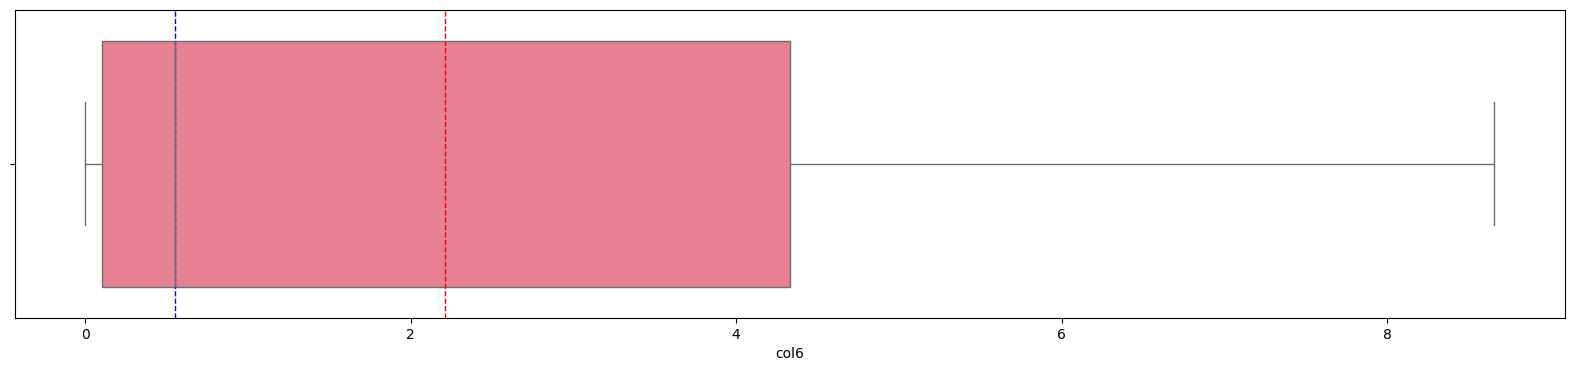

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


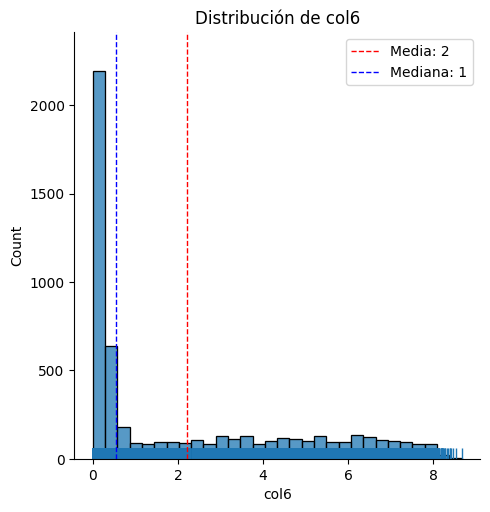

count    5597.0
mean        2.0
std         3.0
min         0.0
25%         0.0
50%         1.0
75%         4.0
max         9.0
Name: col6, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col7



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


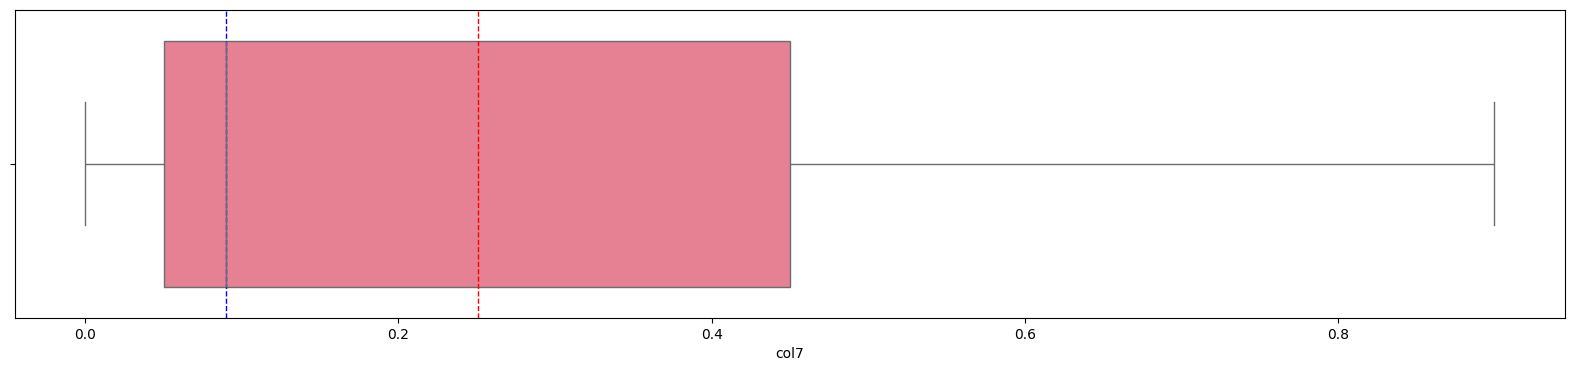

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


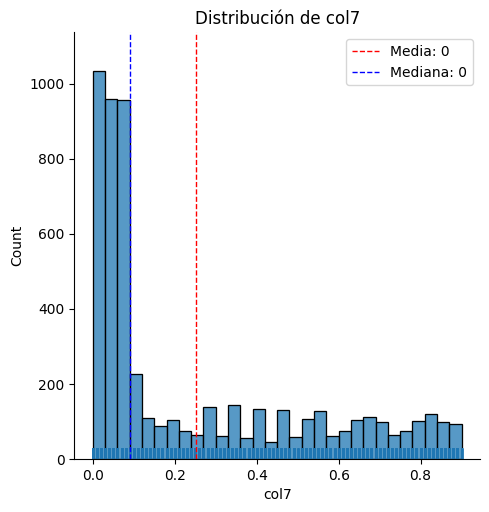

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: col7, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col8



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


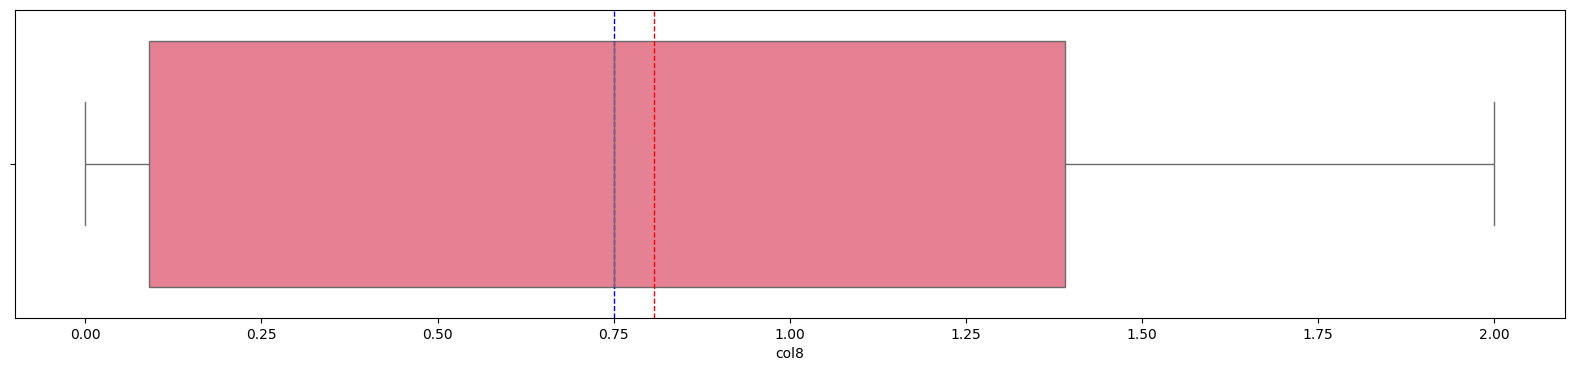

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


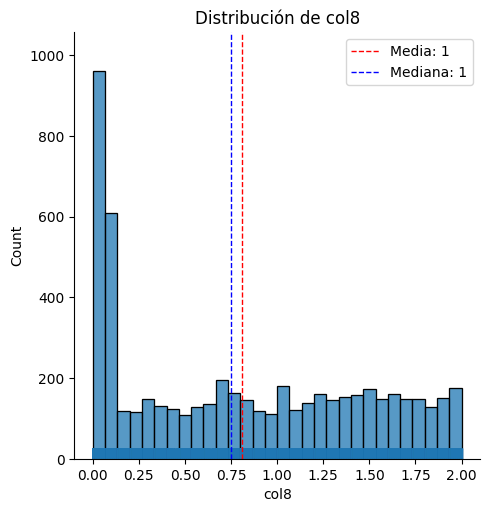

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         2.0
Name: col8, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col9



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


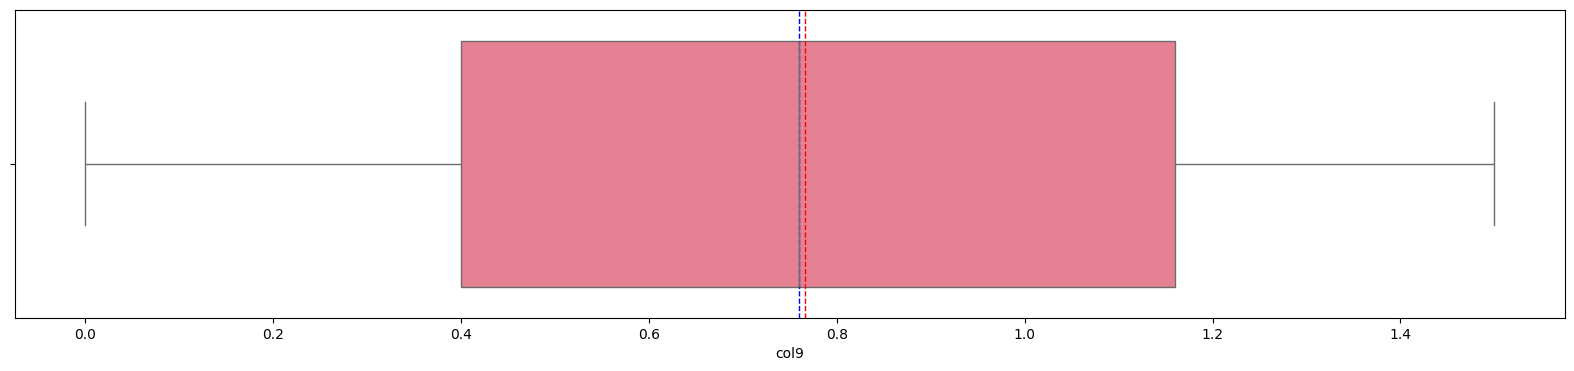

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


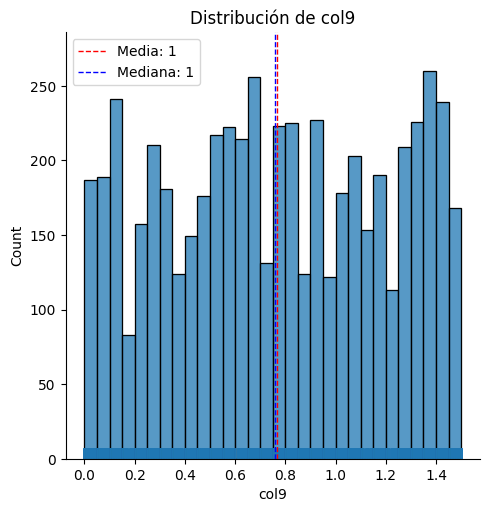

count    5597.0
mean        1.0
std         0.0
min         0.0
25%         0.0
50%         1.0
75%         1.0
max         2.0
Name: col9, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col10



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


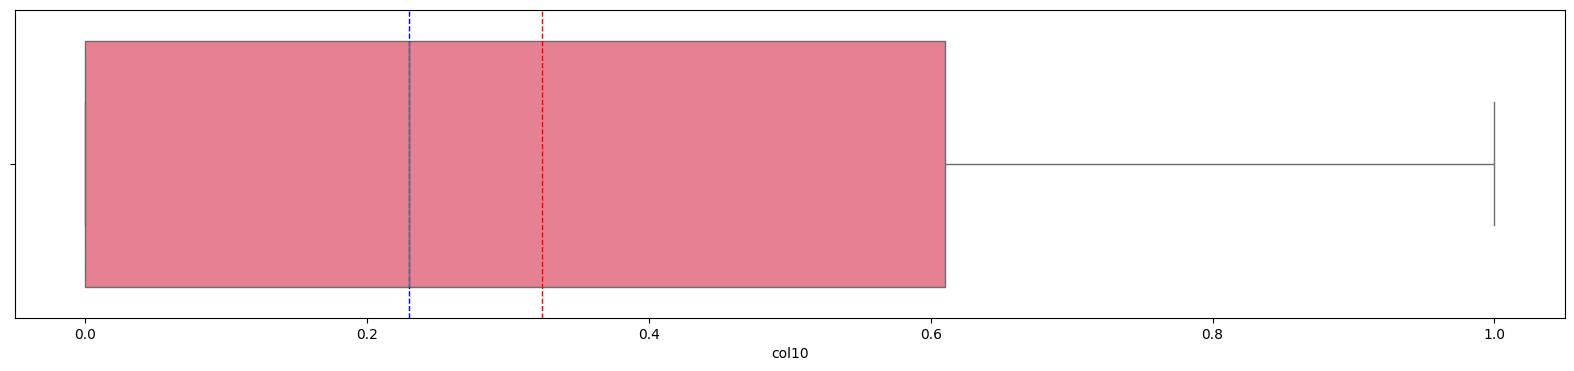

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


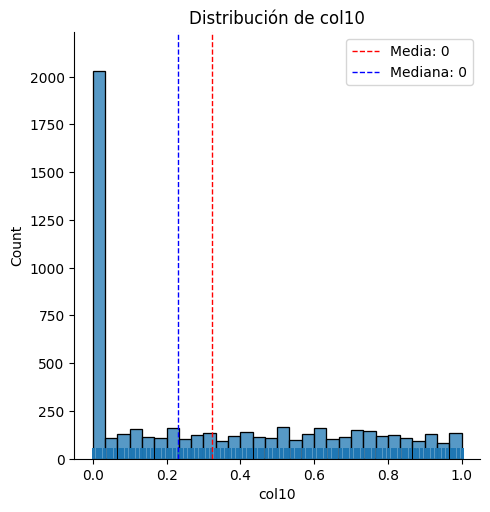

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: col10, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col11



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


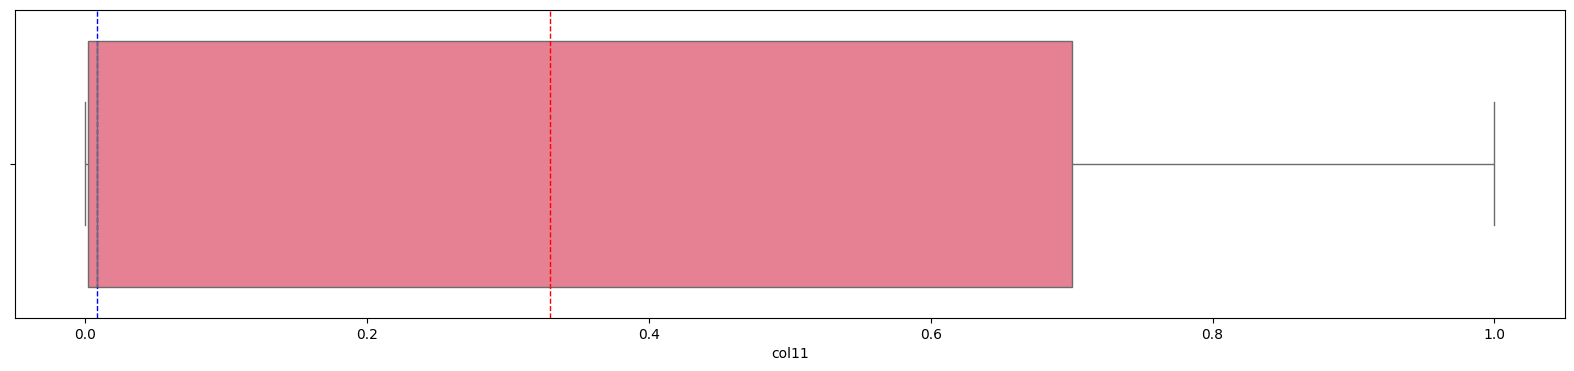

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


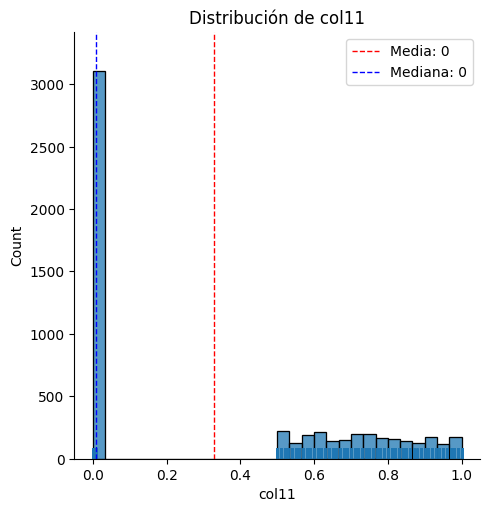

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: col11, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col12



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


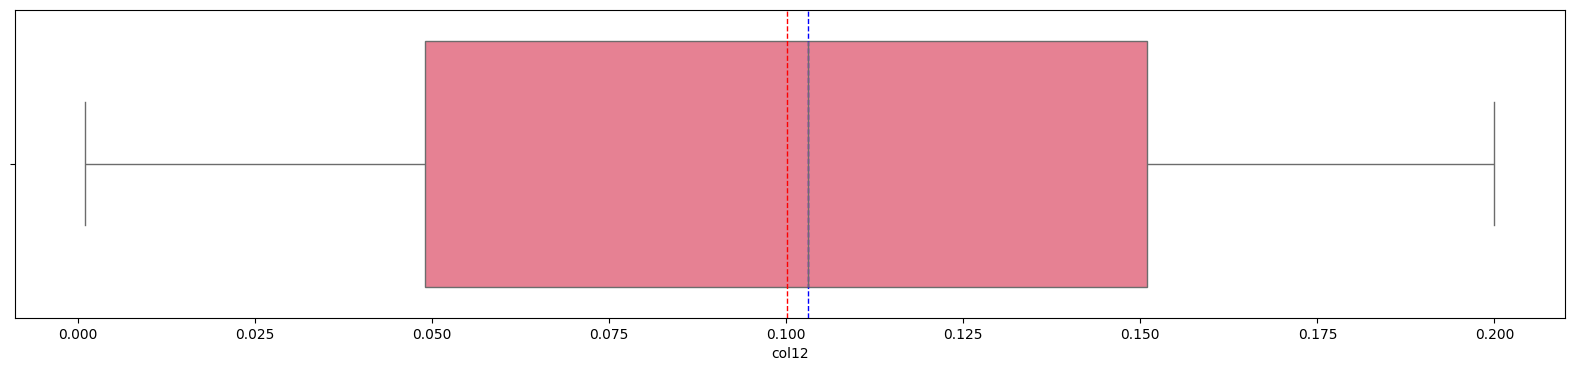

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


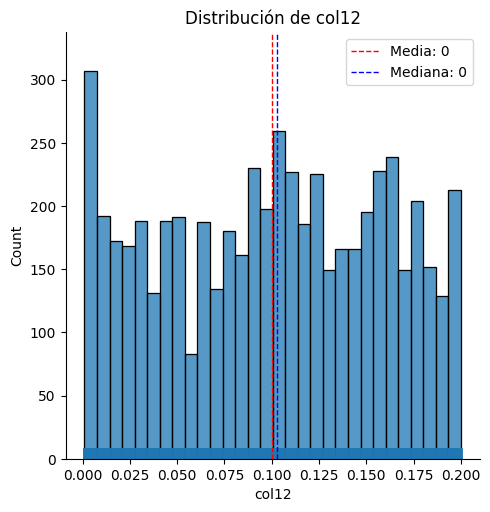

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col12, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col13



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


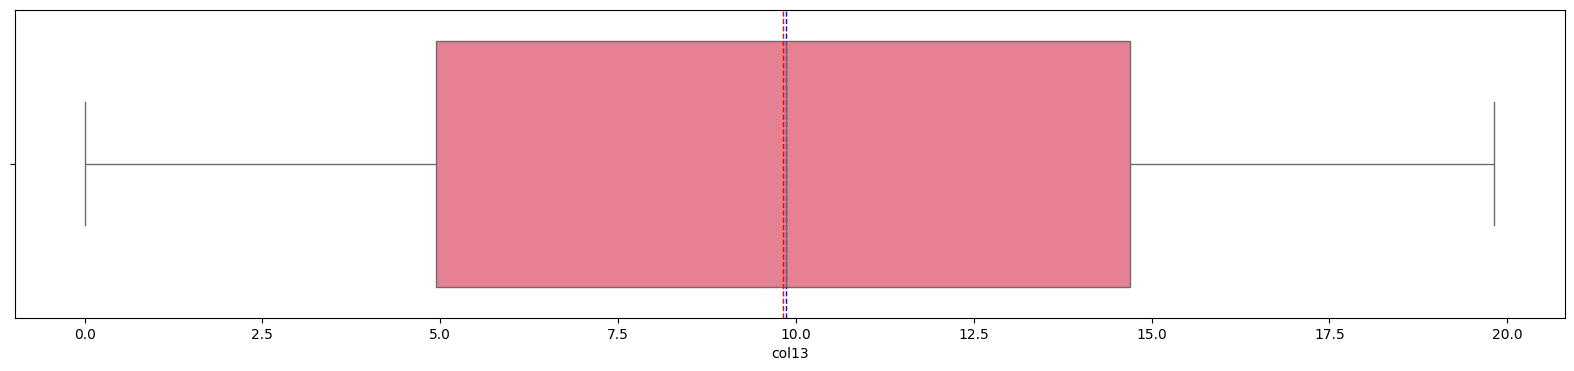

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


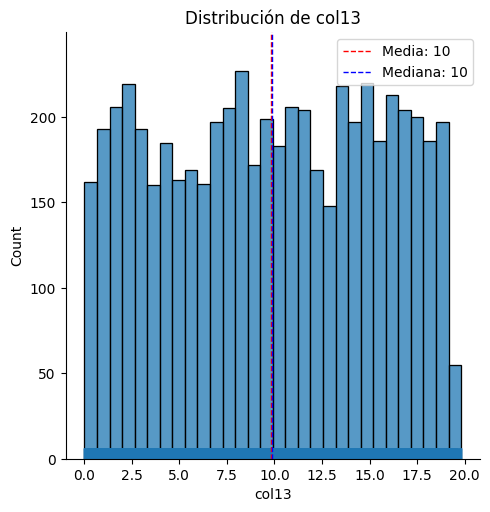

count    5597.0
mean       10.0
std         6.0
min         0.0
25%         5.0
50%        10.0
75%        15.0
max        20.0
Name: col13, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col14



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


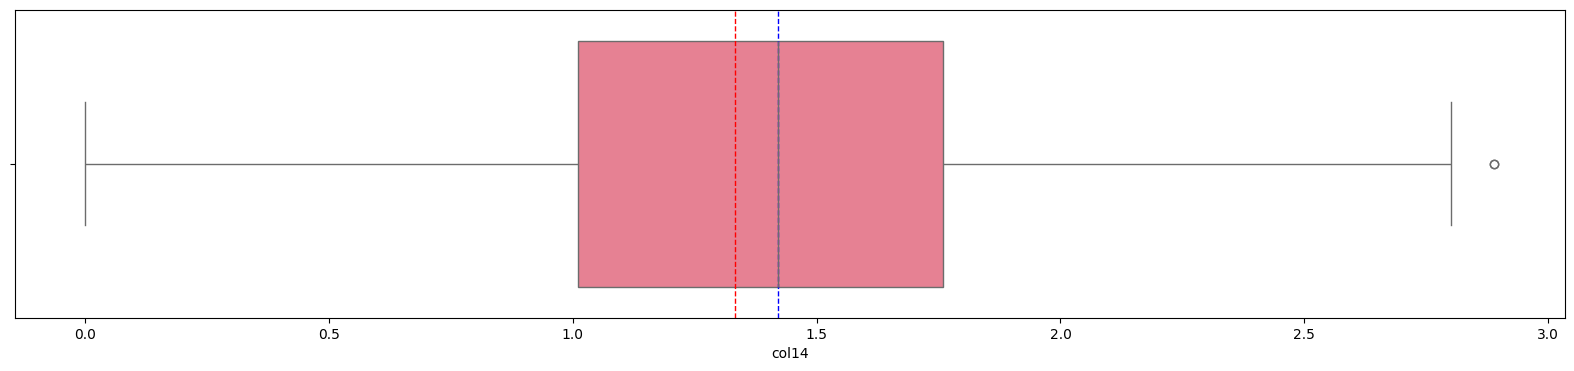

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


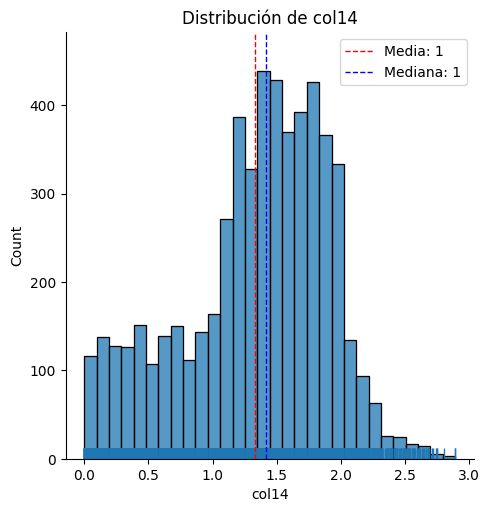

count    5597.0
mean        1.0
std         1.0
min         0.0
25%         1.0
50%         1.0
75%         2.0
max         3.0
Name: col14, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col15



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


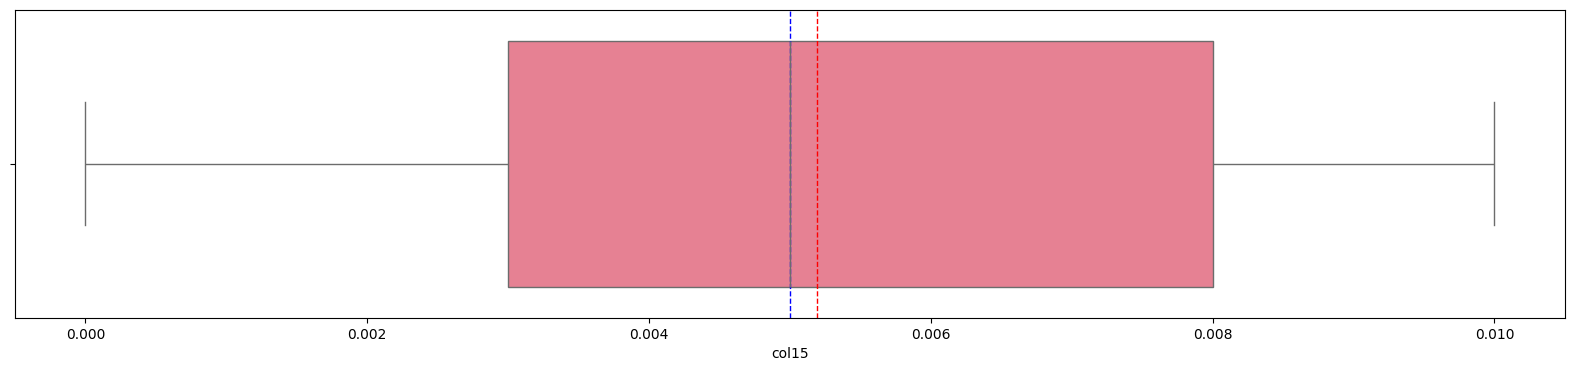

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


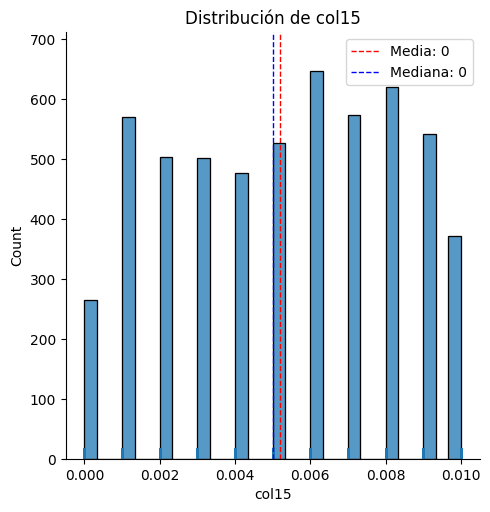

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col15, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col16



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


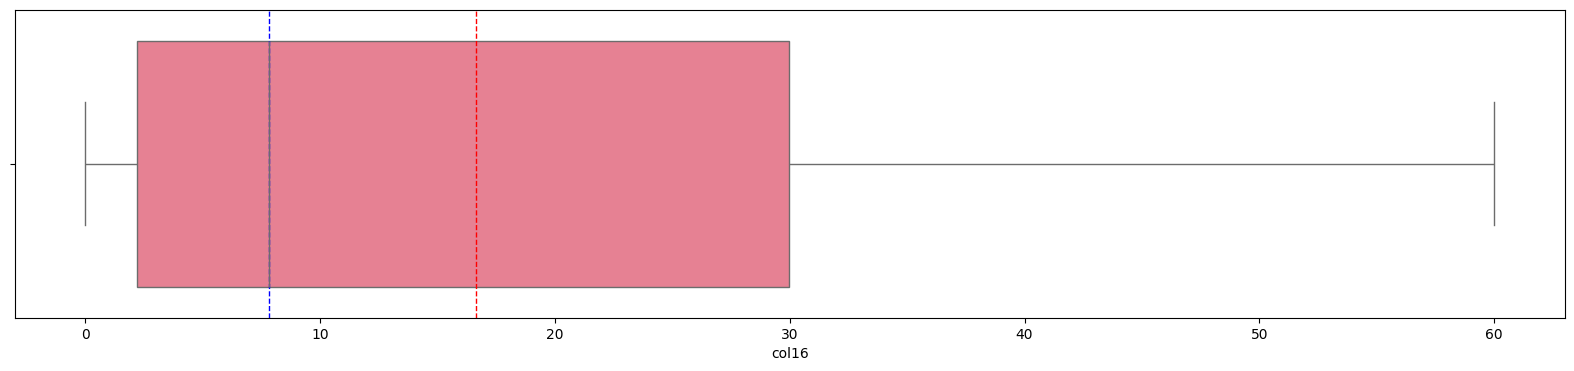

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


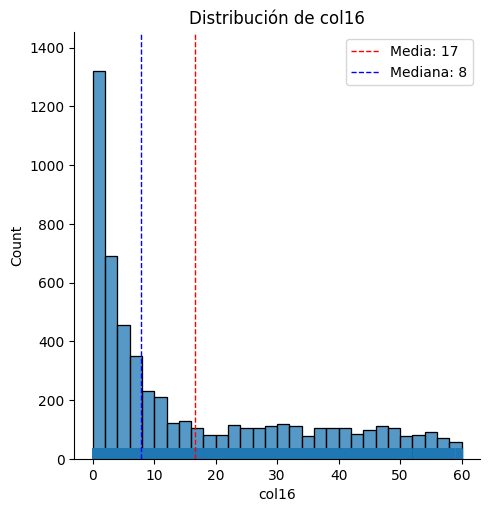

count    5597.0
mean       17.0
std        18.0
min         0.0
25%         2.0
50%         8.0
75%        30.0
max        60.0
Name: col16, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col17



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


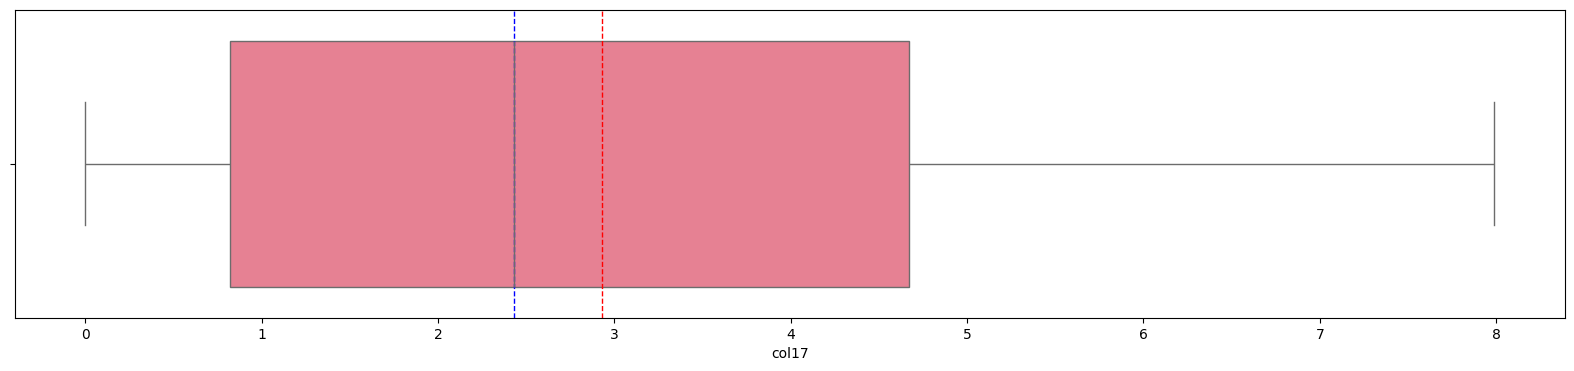

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


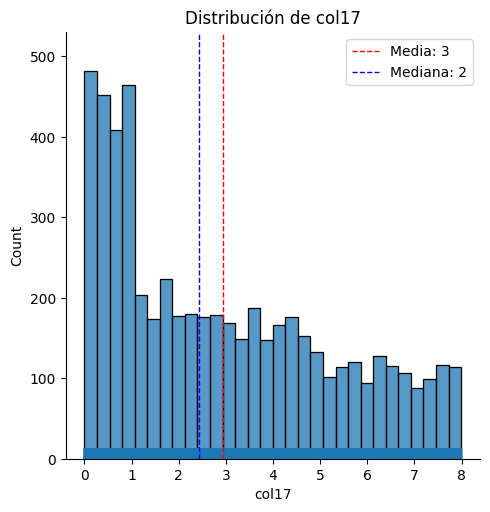

count    5597.0
mean        3.0
std         2.0
min         0.0
25%         1.0
50%         2.0
75%         5.0
max         8.0
Name: col17, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col18



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


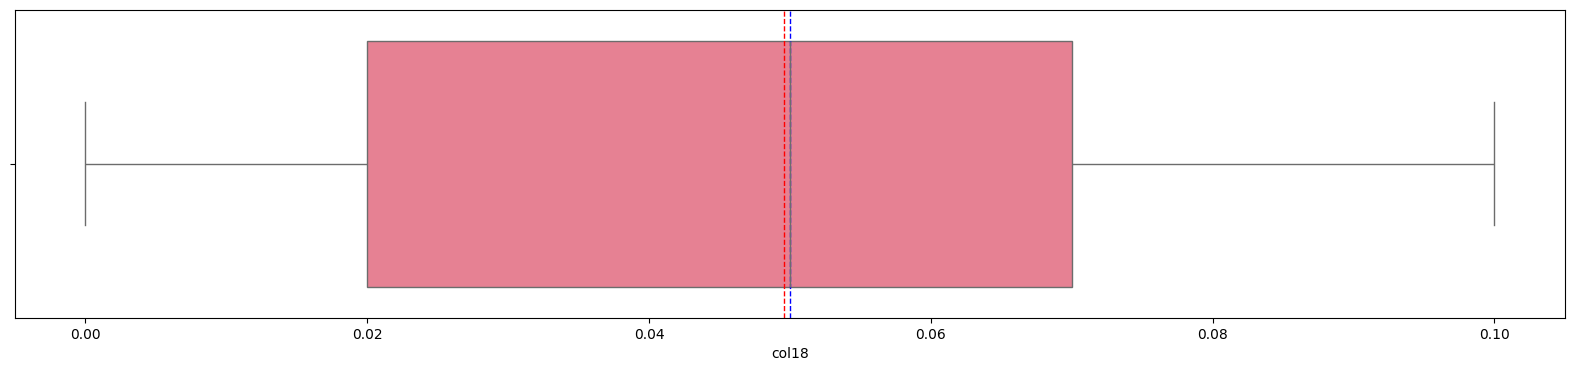

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


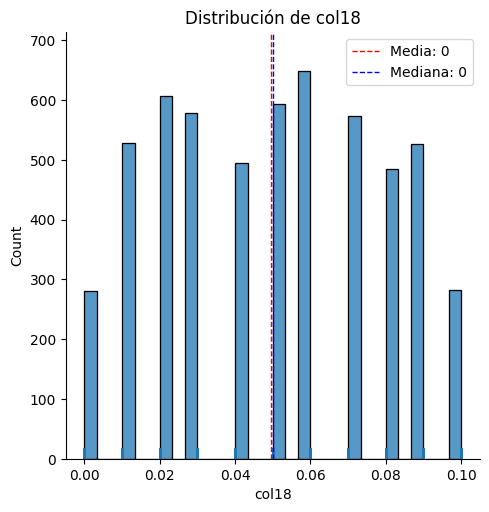

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col18, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col19



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


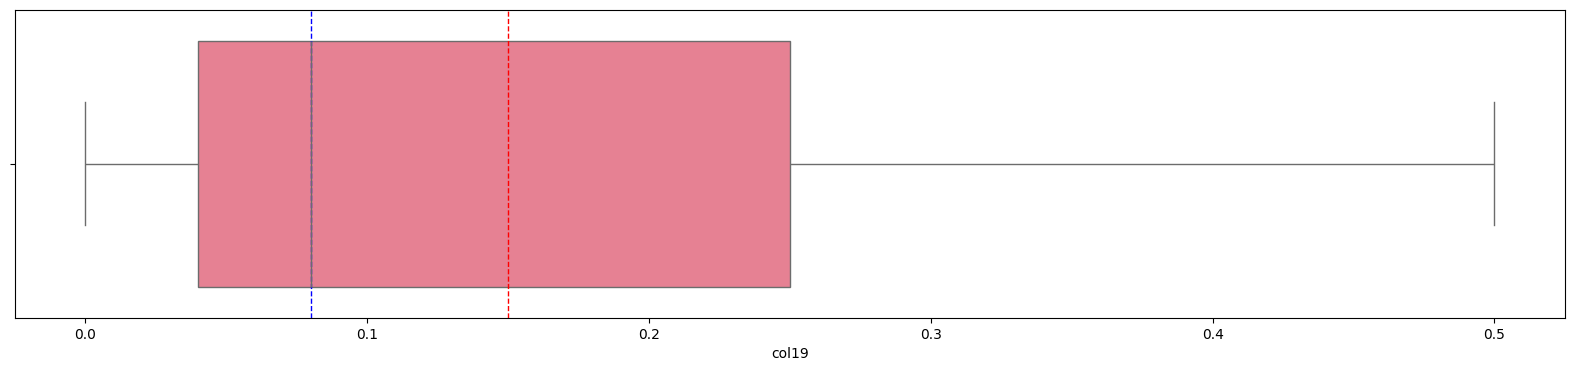

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


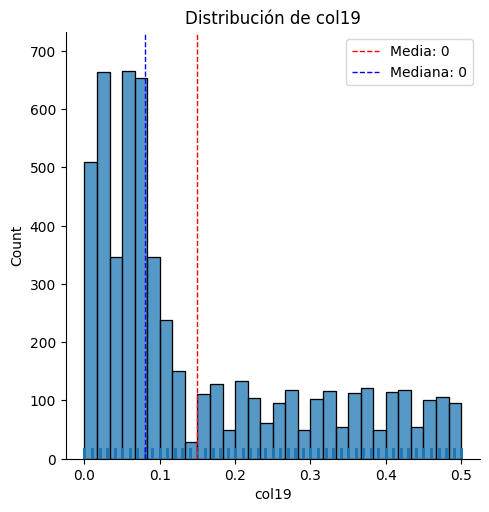

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col19, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: col20



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


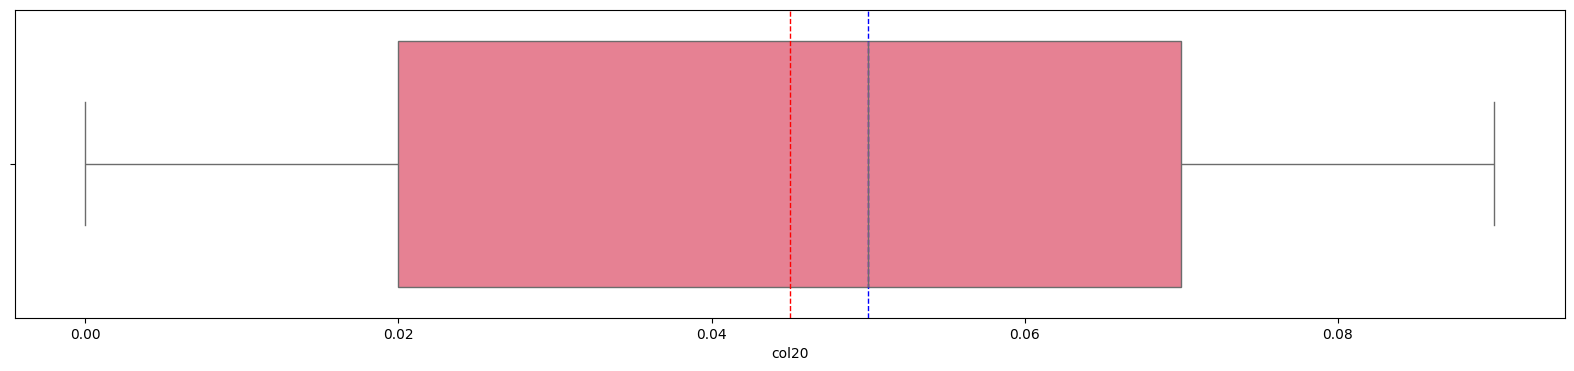

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


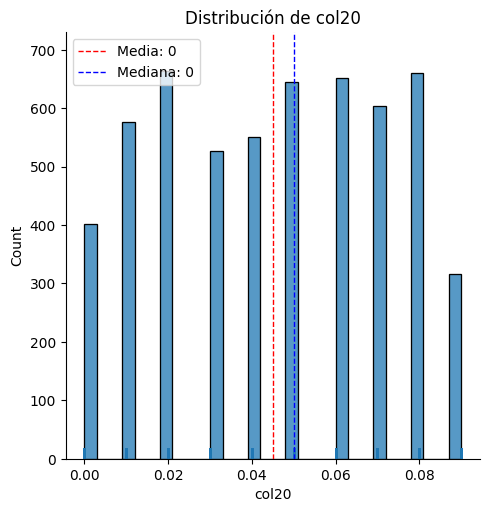

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: col20, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: target



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data[columna], orient='h', palette='husl')


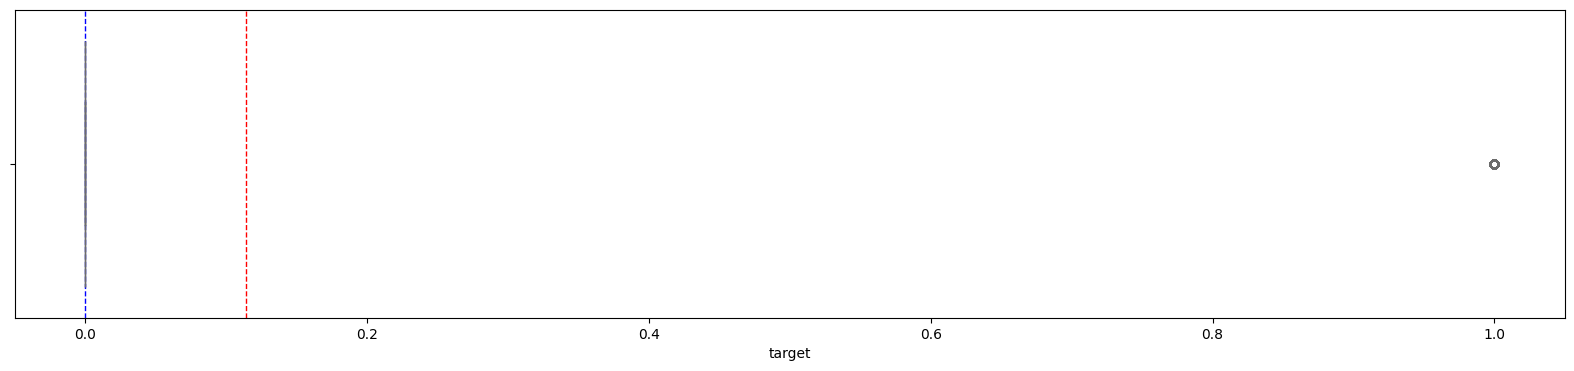

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_20196\229618433.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data[columna], rug = True, palette='husl' , bins = 30)


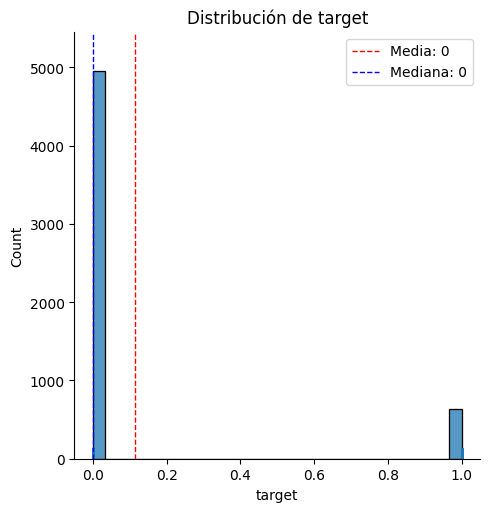

count    5597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: target, dtype: float64
------------------------------------------------------------


In [145]:
graficos_variables_cuant(train)

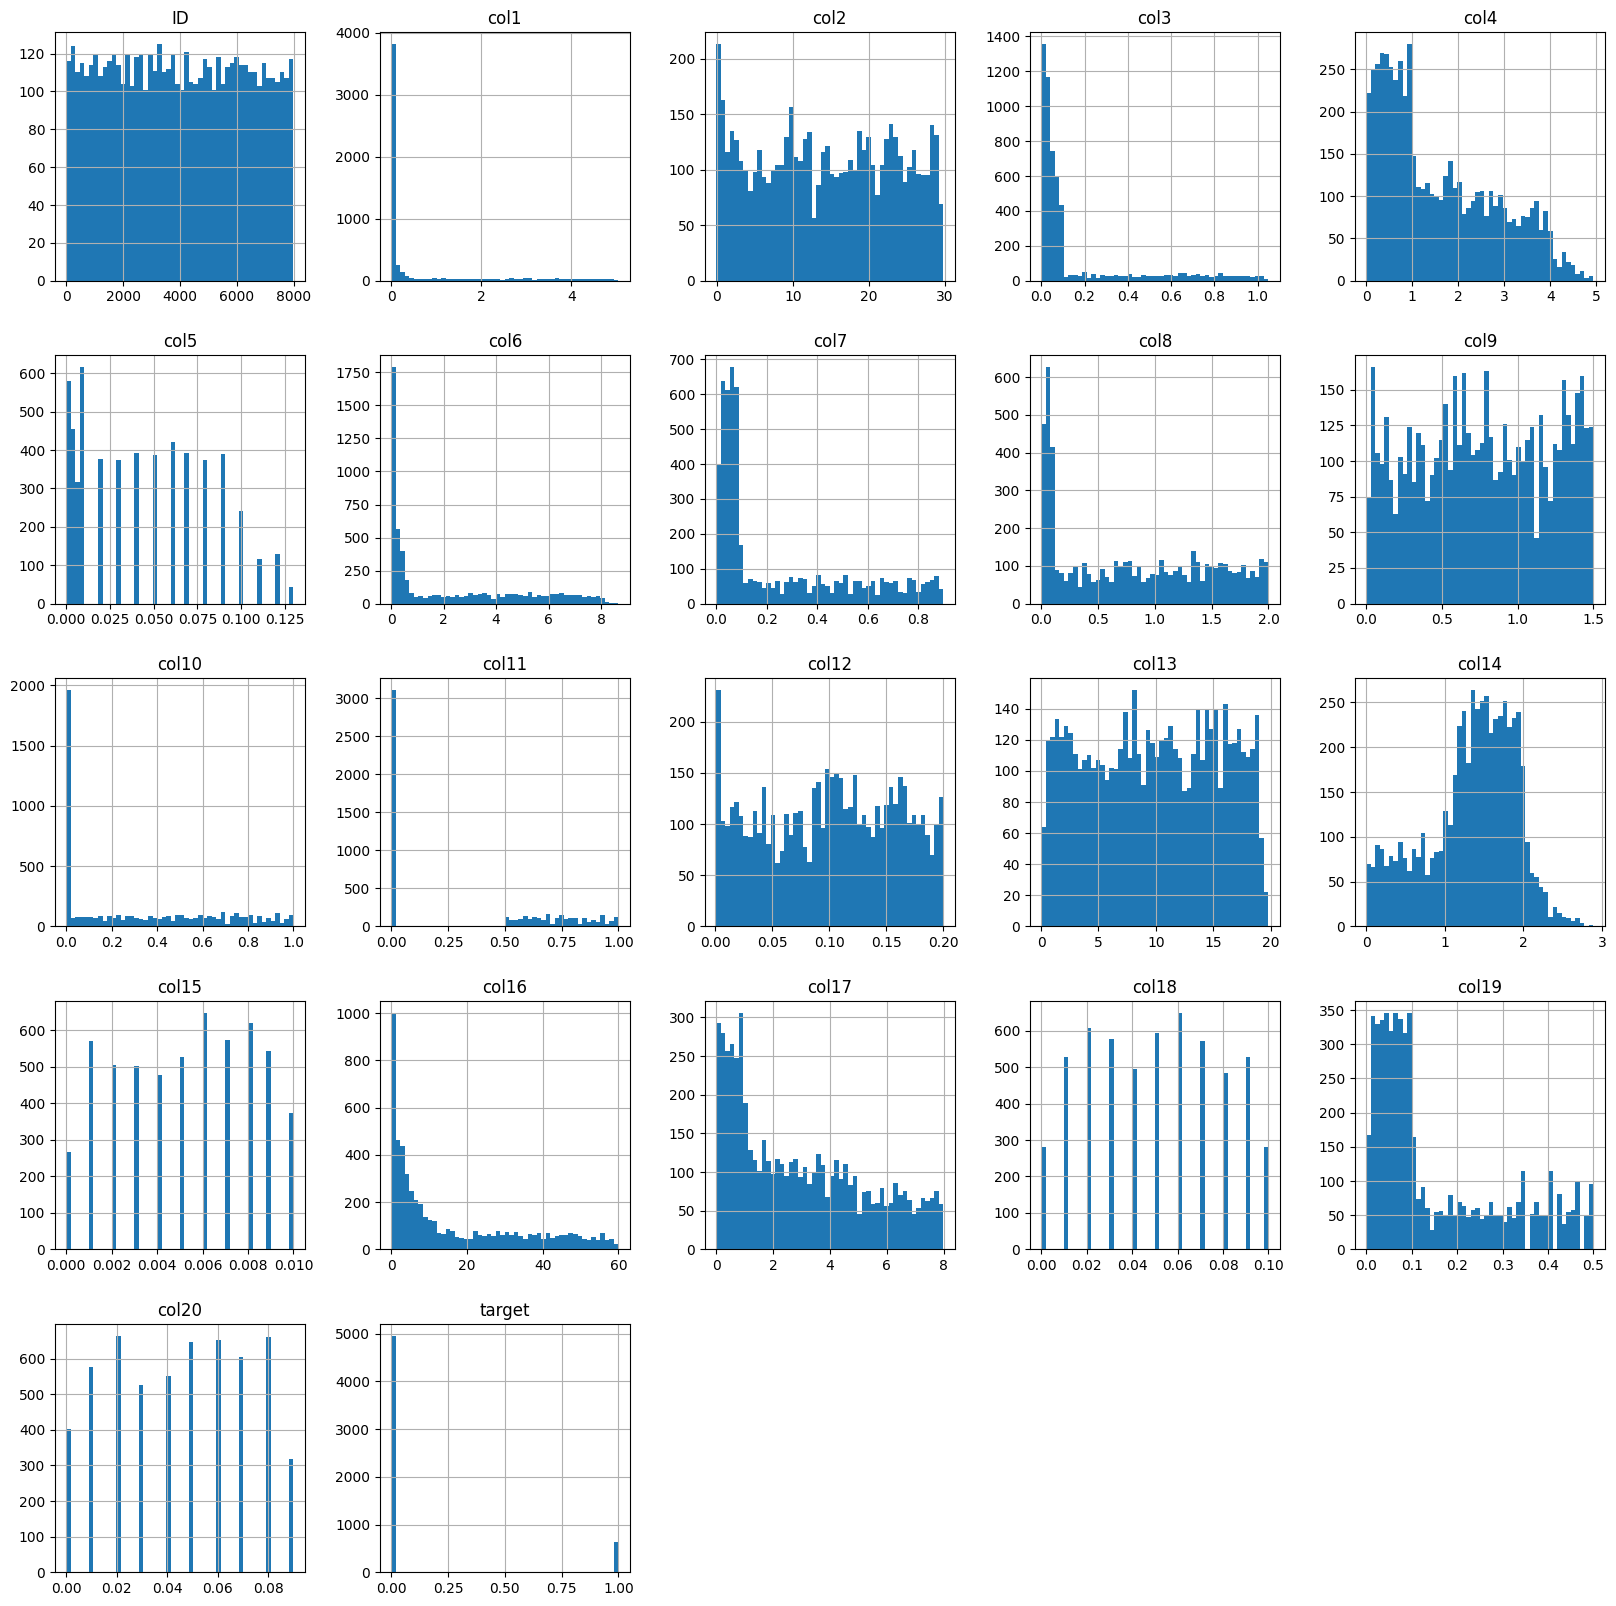

In [146]:
train.hist(bins=50, figsize=(20,20))
plt.show()

## Como es la target

In [147]:
train['target'].value_counts()

target
0    4957
1     640
Name: count, dtype: int64

La target esta desbalanceada por lo que vamos a tener que balancearla para poder mejorar la predicción

## Correlaciones entre variables

In [148]:
train.corr()[['target']]

,target
ID,-0.416405
col1,0.358168
col2,-0.017318
col3,-0.132675
col4,0.104875
col5,-0.271454
col6,0.198555
col7,0.174420
col8,0.031497
col9,0.003556


## Conclusiones

- Vemos que las columnas 1,3,6,7,10,16,19 tiene un sesgo hacia la izquierda por lo que lo vamos a tratar
- Las columnas 2 y 16 tienen medidas mucho más altas que las otras columnas
- La target esta desbalanceada
- La columna target tiene más correlación con las columnas 1,3,4,5,6,7,9

## Dvisión de datos

In [149]:
X = train.drop(columns=['ID', 'col2', 'col8',
        'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'target'], axis=1)
y = train['target']

In [150]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 33)

array([[<AxesSubplot: title={'center': 'col1'}>,
        <AxesSubplot: title={'center': 'col3'}>,
        <AxesSubplot: title={'center': 'col4'}>],
       [<AxesSubplot: title={'center': 'col5'}>,
        <AxesSubplot: title={'center': 'col6'}>,
        <AxesSubplot: title={'center': 'col7'}>],
       [<AxesSubplot: title={'center': 'col9'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

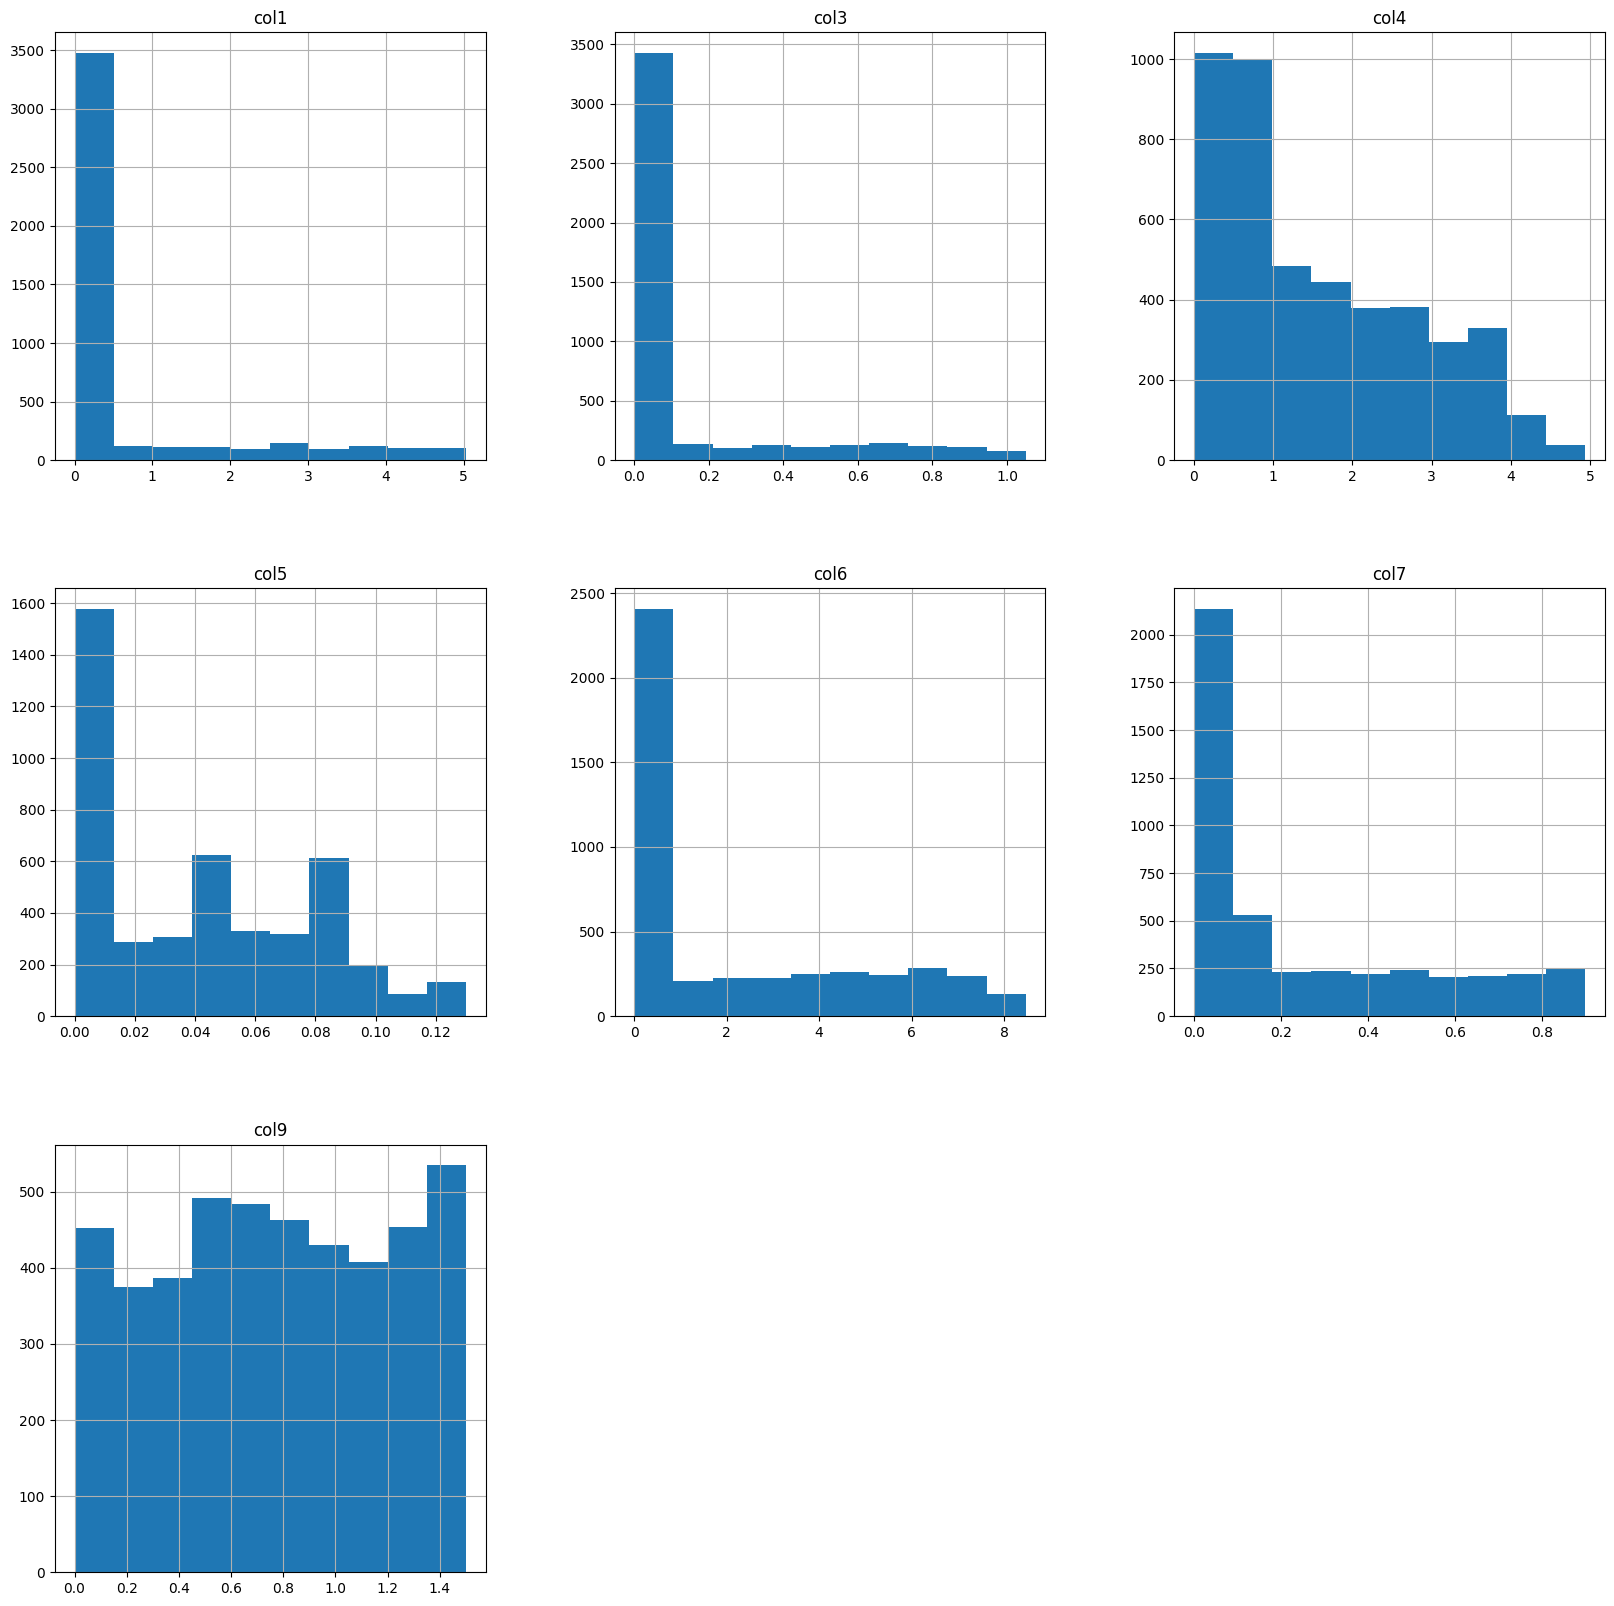

In [151]:
X_train.hist(figsize=(20,20))

## Aplicamos log para normalizar las columnas que tiene sesgo hacia la izq

Vemos si mejora sino probamos sin aplicarlo

X_train

In [152]:
columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

for i in columnas:
    X_train[i] = np.log(X_train[i] + 1)

X_validation

In [153]:
columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

for i in columnas:
    X_validation[i] = np.log(X_validation[i] + 1)

## Balanceamos las clases

Solo se hace en el train para que el modelo aprenda mejor

In [154]:
# smote = SMOTE(random_state = 40, k_neighbors=6)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [129]:
y_train.value_counts()

target
0    3962
1     515
Name: count, dtype: int64

In [130]:
# oversampler = RandomOverSampler(random_state=42)

# X_train, y_train = oversampler.fit_resample(X_train, y_train)

In [156]:
undersampler = RandomUnderSampler(random_state=42)

X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [157]:
y_train.value_counts()

target
0    515
1    515
Name: count, dtype: int64

## Modelos

In [158]:
model_0 = SVC(random_state=40)
model_1 = LogisticRegression(random_state=40)
model_2 = RandomForestClassifier(class_weight='balanced', random_state=40)
model_3 = XGBClassifier(random_state=40)
model_4 = CatBoostClassifier( random_state=40)

In [159]:
models = [model_0, model_1, model_2, model_3, model_4]

In [160]:
dicc = {}
for i in models:
    scores = cross_val_score(i, X_train, y_train, cv=10, scoring='balanced_accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{i}- 'balanced_accuracy' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

Learning rate set to 0.009974
0:	learn: 0.6860781	total: 2ms	remaining: 1.99s
1:	learn: 0.6791436	total: 3.77ms	remaining: 1.88s
2:	learn: 0.6724847	total: 5.73ms	remaining: 1.91s
3:	learn: 0.6655424	total: 7.57ms	remaining: 1.89s
4:	learn: 0.6593967	total: 9.38ms	remaining: 1.87s
5:	learn: 0.6527149	total: 11.2ms	remaining: 1.85s
6:	learn: 0.6467605	total: 13.1ms	remaining: 1.86s
7:	learn: 0.6405903	total: 14.8ms	remaining: 1.84s
8:	learn: 0.6346877	total: 16.6ms	remaining: 1.83s
9:	learn: 0.6290463	total: 18.3ms	remaining: 1.81s
10:	learn: 0.6234075	total: 20.1ms	remaining: 1.81s
11:	learn: 0.6179627	total: 22ms	remaining: 1.81s
12:	learn: 0.6126024	total: 23.7ms	remaining: 1.8s
13:	learn: 0.6075016	total: 25.4ms	remaining: 1.79s
14:	learn: 0.6020443	total: 27.2ms	remaining: 1.79s
15:	learn: 0.5970907	total: 28.9ms	remaining: 1.78s
16:	learn: 0.5921016	total: 30.6ms	remaining: 1.77s
17:	learn: 0.5879511	total: 32.4ms	remaining: 1.76s
18:	learn: 0.5830954	total: 34.1ms	remaining: 1.76

,0
<catboost.core.CatBoostClassifier object at 0x0000024A975BB5E0>- 'balanced_accuracy',0.842590
"RandomForestClassifier(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.840686
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=40, ...)- 'balanced_accuracy'",0.817327
SVC(random_state=40)- 'balanced_accuracy',0.813367
LogisticRegression(random_state=40)- 'balanced_accuracy',0.798925


In [161]:
models_1 = [model_4, model_3, model_2]

In [57]:
lista_params = []
for i in models_1:
    if type(i).__name__ == 'CatBoostClassifier':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1],
            'depth': [4, 6, 8],
            'l2_leaf_reg': [1, 3, 5]
        }
    elif type(i).__name__ == 'XGBClassifier':
        param_grid = {
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [3, 6, 9],
            'min_child_weight': [1, 3, 5],
            'gamma': [0, 0.1, 0.3]
        }
    else:
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [2, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }

    grid_search = GridSearchCV(i,
                            param_grid,
                            cv=5,
                            scoring='neg_mean_squared_error',
                            n_jobs=-1
                            )

    grid_search.fit(X_train, y_train)
    lista_params.append(grid_search.best_params_)

lista_params

0:	learn: 0.6216321	total: 6.91ms	remaining: 6.91s
1:	learn: 0.5630759	total: 12.9ms	remaining: 6.42s
2:	learn: 0.5185096	total: 19.1ms	remaining: 6.33s
3:	learn: 0.4840064	total: 25.5ms	remaining: 6.35s
4:	learn: 0.4453736	total: 31.6ms	remaining: 6.3s
5:	learn: 0.4223299	total: 37.9ms	remaining: 6.28s
6:	learn: 0.4067365	total: 43.9ms	remaining: 6.23s
7:	learn: 0.3894353	total: 49.8ms	remaining: 6.18s
8:	learn: 0.3710072	total: 56ms	remaining: 6.16s
9:	learn: 0.3533003	total: 62.5ms	remaining: 6.18s
10:	learn: 0.3434026	total: 68.7ms	remaining: 6.18s
11:	learn: 0.3322210	total: 74.6ms	remaining: 6.14s
12:	learn: 0.3228688	total: 80.9ms	remaining: 6.14s
13:	learn: 0.3175437	total: 87.3ms	remaining: 6.15s
14:	learn: 0.3120048	total: 93.4ms	remaining: 6.13s
15:	learn: 0.3054174	total: 99.8ms	remaining: 6.14s
16:	learn: 0.2961229	total: 106ms	remaining: 6.13s
17:	learn: 0.2900041	total: 112ms	remaining: 6.1s
18:	learn: 0.2837533	total: 118ms	remaining: 6.11s
19:	learn: 0.2788968	total: 1

[{'depth': 8, 'l2_leaf_reg': 3, 'learning_rate': 0.1},
 {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 1},
 {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100}]

In [68]:
model_22 = RandomForestClassifier(class_weight='balanced', random_state=40)
model_33 = XGBClassifier(gamma = 0, learning_rate = 0.1, max_depth = 9, min_child_weight= 1, random_state=40)
model_44 = CatBoostClassifier( depth=8, l2_leaf_reg=3, learning_rate=0.1 ,random_state=40)
model_55 = voting_clf = VotingClassifier(
    estimators=[
        ('rfc', model_22),
        ('xgb', model_33),
        ('cb', model_44)
    ],voting='soft'
)

In [66]:
models_2 = [model_22, model_33, model_44, model_55]

In [67]:
dicc = {}
for i in models_2:
    scores = cross_val_score(i, X_train, y_train, cv=10, scoring='balanced_accuracy')
    media = scores.mean()
    estandar = scores.std()
    clave = f"{i}- 'balanced_accuracy' "

    dicc[clave] = media

df_scores = pd.DataFrame([dicc]).T.sort_values(by=0, ascending=False)
df_scores

0:	learn: 0.6225505	total: 5.9ms	remaining: 5.89s
1:	learn: 0.5602702	total: 11.1ms	remaining: 5.56s
2:	learn: 0.5086500	total: 16.6ms	remaining: 5.53s
3:	learn: 0.4699174	total: 22.5ms	remaining: 5.61s
4:	learn: 0.4393162	total: 27.9ms	remaining: 5.55s
5:	learn: 0.4135539	total: 33.6ms	remaining: 5.56s
6:	learn: 0.3959062	total: 39.1ms	remaining: 5.54s
7:	learn: 0.3767399	total: 44.3ms	remaining: 5.5s
8:	learn: 0.3613852	total: 50.1ms	remaining: 5.52s
9:	learn: 0.3503348	total: 56.3ms	remaining: 5.58s
10:	learn: 0.3406337	total: 62.7ms	remaining: 5.63s
11:	learn: 0.3302897	total: 68.9ms	remaining: 5.67s
12:	learn: 0.3102656	total: 75.2ms	remaining: 5.71s
13:	learn: 0.2969541	total: 81.4ms	remaining: 5.73s
14:	learn: 0.2905528	total: 87.9ms	remaining: 5.77s
15:	learn: 0.2861447	total: 93.9ms	remaining: 5.78s
16:	learn: 0.2794342	total: 99.8ms	remaining: 5.77s
17:	learn: 0.2729616	total: 106ms	remaining: 5.8s
18:	learn: 0.2687637	total: 112ms	remaining: 5.77s
19:	learn: 0.2629429	total:

,0
"VotingClassifier(estimators=[('rfc',\n RandomForestClassifier(class_weight='balanced',\n random_state=40)),\n ('xgb',\n XGBClassifier(base_score=None, booster=None,\n callbacks=None,\n colsample_bylevel=None,\n colsample_bynode=None,\n colsample_bytree=None, device=None,\n early_stopping_rounds=None,\n enable_categorical=False,\n eval_metric=None,\n feature_types=None, gamma=0,\n grow_poli...\n learning_rate=0.1, max_bin=None,\n max_cat_threshold=None,\n max_cat_to_onehot=None,\n max_delta_step=None, max_depth=9,\n max_leaves=None, min_child_weight=1,\n missing=nan,\n monotone_constraints=None,\n multi_strategy=None,\n n_estimators=None, n_jobs=None,\n num_parallel_tree=None,\n random_state=40, ...)),\n ('cb',\n <catboost.core.CatBoostClassifier object at 0x0000024A975B8EB0>)],\n voting='soft')- 'balanced_accuracy'",0.952216
<catboost.core.CatBoostClassifier object at 0x0000024A975B8EB0>- 'balanced_accuracy',0.951340
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=0, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=0.1, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=9, max_leaves=None,\n min_child_weight=1, missing=nan, monotone_constraints=None,\n multi_strategy=None, n_estimators=None, n_jobs=None,\n num_parallel_tree=None, random_state=40, ...)- 'balanced_accuracy'",0.944898
"RandomForestClassifier(class_weight='balanced', random_state=40)- 'balanced_accuracy'",0.940595


In [162]:
model = model_55.fit(X_train, y_train)

0:	learn: 0.6199428	total: 3.89ms	remaining: 3.89s
1:	learn: 0.5603999	total: 7.41ms	remaining: 3.7s
2:	learn: 0.5221721	total: 8.9ms	remaining: 2.96s
3:	learn: 0.4894377	total: 12.2ms	remaining: 3.04s
4:	learn: 0.4667282	total: 15.5ms	remaining: 3.09s
5:	learn: 0.4426451	total: 19.2ms	remaining: 3.19s
6:	learn: 0.4246394	total: 22.7ms	remaining: 3.22s
7:	learn: 0.4097095	total: 26ms	remaining: 3.22s
8:	learn: 0.3949025	total: 29.5ms	remaining: 3.25s
9:	learn: 0.3840019	total: 32.9ms	remaining: 3.26s
10:	learn: 0.3800453	total: 34.4ms	remaining: 3.09s
11:	learn: 0.3697954	total: 37.8ms	remaining: 3.12s
12:	learn: 0.3622044	total: 41.4ms	remaining: 3.14s
13:	learn: 0.3535773	total: 44.6ms	remaining: 3.14s
14:	learn: 0.3482362	total: 48ms	remaining: 3.15s
15:	learn: 0.3412885	total: 51.4ms	remaining: 3.16s
16:	learn: 0.3350478	total: 55ms	remaining: 3.18s
17:	learn: 0.3300779	total: 58.3ms	remaining: 3.18s
18:	learn: 0.3244481	total: 61.8ms	remaining: 3.19s
19:	learn: 0.3214144	total: 65

In [163]:
y_pred = model.predict(X_validation)
print(f"Modelo {model} : {balanced_accuracy_score(y_validation, y_pred)}")
print(classification_report(y_validation, y_pred))

Modelo VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(class_weight='balanced',
                                                     random_state=40)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_poli...
                                            learning_rate=0.1, max_bin=None,
        

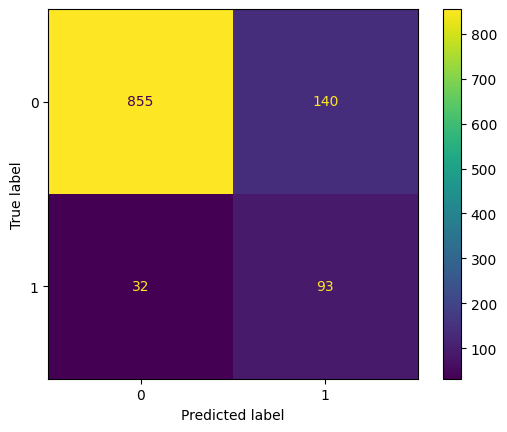

In [164]:
ConfusionMatrixDisplay(confusion_matrix(y_validation,y_pred)).plot()

Sigue teniendo un recall muy bajo aunque balanceamos las clases, voy a probar contra el test para ver si mejora - 
probamos varios modelos de balanceo para ver cual mejora Vemos que haciendo un Under sampling baja un poco el acuracy del modelo de 0.94 a 0.85 pero la predicción de la clase minoritaria sube de 0.63 a 0.74

In [165]:
test = pd.read_csv("data/test.csv")

In [166]:
test

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20
0,2816,0.06,25.18,0.04,0.04,0.001,5.10,0.86,1.23,0.52,...,0.620,0.022,12.63,1.93,0.003,1.19,7.79,0.04,0.43,0.01
1,3641,0.09,27.51,0.63,2.05,0.110,6.81,0.83,0.09,1.21,...,0.730,0.001,4.49,1.95,0.009,52.30,1.00,0.10,0.12,0.01
2,7191,0.09,1.10,0.07,0.73,0.050,0.10,0.01,1.44,1.42,...,0.007,0.177,1.03,1.27,0.002,7.04,0.38,0.06,0.05,0.06
3,5199,0.07,11.23,0.04,1.22,0.030,0.16,0.03,1.18,0.88,...,0.001,0.032,4.07,0.98,0.003,1.28,0.51,0.06,0.03,0.07
4,7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,...,0.000,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,7300,0.06,0.60,0.02,0.46,0.090,0.20,0.08,0.70,0.57,...,0.005,0.065,16.31,2.12,0.008,2.73,3.53,0.03,0.07,0.03
2395,1327,2.99,11.76,0.64,2.71,0.010,2.36,0.57,1.81,0.38,...,0.006,0.083,7.72,1.67,0.007,12.99,6.11,0.05,0.24,0.00
2396,4739,0.08,10.53,0.09,2.97,0.010,0.65,0.05,0.04,1.38,...,0.005,0.033,7.43,0.62,0.007,4.49,0.50,0.09,0.05,0.02
2397,2611,0.08,9.74,0.01,0.22,0.001,4.50,0.66,0.01,0.56,...,0.002,0.185,15.38,1.24,0.003,43.87,3.36,0.05,0.04,0.08


In [172]:
X_test = test.drop(columns=['ID', 'col2', 'col8',
        'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20'], axis=1)

In [173]:
columnas = ['col1', 'col3', 'col5', 'col6', 'col7']

for i in columnas:
    X_test[i] = np.log(X_test[i] + 1)

In [174]:
y_pred = model.predict(X_test)

In [175]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [176]:
pd.DataFrame(y_pred).value_counts()

0    1945
1     454
Name: count, dtype: int64